In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
customers = pd.read_csv("/content/Customers.csv")
products = pd.read_csv("/content/Products.csv")
transactions = pd.read_csv("/content/Transactions.csv")


In [4]:
# Merge datasets
data = pd.merge(transactions, customers, on='CustomerID', how='left')
data = pd.merge(data, products, on='ProductID', how='left')

# Count unique regions
num_regions = customers['Region'].nunique()
print(f"Number of unique regions: {num_regions}")

# Group by region and sum quantities
region_product_data = data.groupby('Region').agg({'Quantity': 'sum'}).reset_index()
region_product_data.rename(columns={'Quantity': 'TotalProductsPurchased'}, inplace=True)

Number of unique regions: 4


<ipython-input-5-858f0d2ebb5a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=region_product_data, x='Region', y='TotalProductsPurchased', palette='coolwarm')


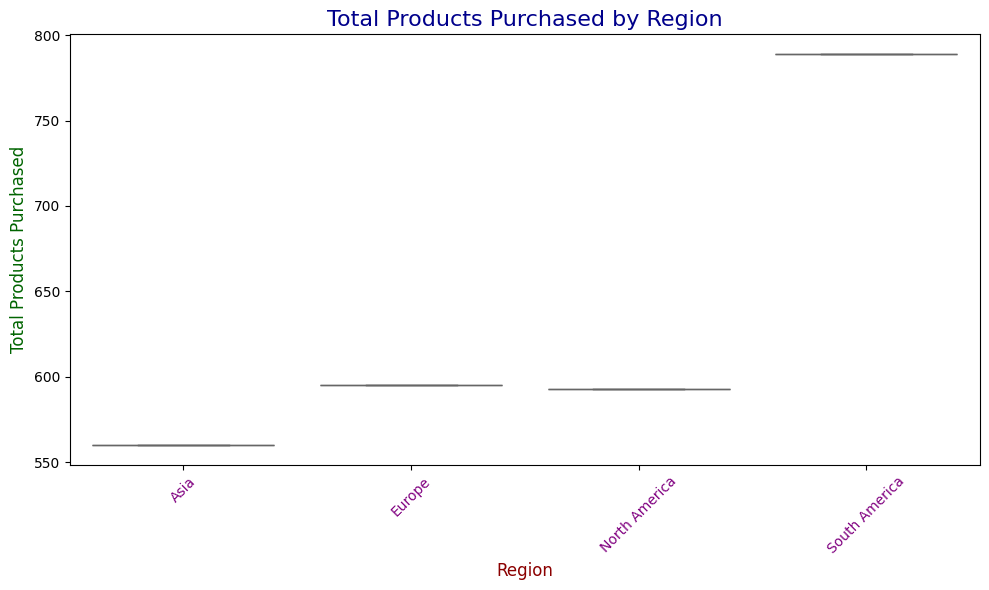

In [5]:
# Box plot of total products purchased by region
plt.figure(figsize=(10, 6))
sns.boxplot(data=region_product_data, x='Region', y='TotalProductsPurchased', palette='coolwarm')
plt.title('Total Products Purchased by Region', fontsize=16, color='darkblue')
plt.xlabel('Region', fontsize=12, color='darkred')
plt.ylabel('Total Products Purchased', fontsize=12, color='darkgreen')
plt.xticks(rotation=45, color='purple')
plt.tight_layout()
plt.show()

In [6]:

# Find the most popular product
most_popular_product_id = data.groupby('ProductID')['Quantity'].sum().idxmax()
most_popular_product_name = products.loc[products['ProductID'] == most_popular_product_id, 'ProductName'].values[0]
num_customers_popular_product = data[data['ProductID'] == most_popular_product_id]['CustomerID'].nunique()

print(f"Most popular product: {most_popular_product_name}")
print(f"Number of customers who purchased the most popular product: {num_customers_popular_product}")


Most popular product: SoundWave Cookbook
Number of customers who purchased the most popular product: 15


In [8]:
# Merge datasets
data = pd.merge(transactions, customers, on='CustomerID', how='left')
data = pd.merge(data, products, on='ProductID', how='left')

# Group by region and calculate total products purchased
region_orders = data.groupby('Region').agg({'Quantity': 'sum'}).reset_index()
region_orders.rename(columns={'Quantity': 'TotalProductsPurchased'}, inplace=True)

# Calculate percentage for each region
region_orders['Percentage'] = (region_orders['TotalProductsPurchased'] /
                               region_orders['TotalProductsPurchased'].sum()) * 100

# Average products purchased by region
region_avg_products = data.groupby('Region')['Quantity'].mean().reset_index()
region_avg_products.rename(columns={'Quantity': 'AvgProductsPurchased'}, inplace=True)

# Print the regions and their average product purchases
print("Average number of products purchased per region:")
print(region_avg_products)


Average number of products purchased per region:
          Region  AvgProductsPurchased
0           Asia              2.568807
1         Europe              2.542735
2  North America              2.430328
3  South America              2.595395


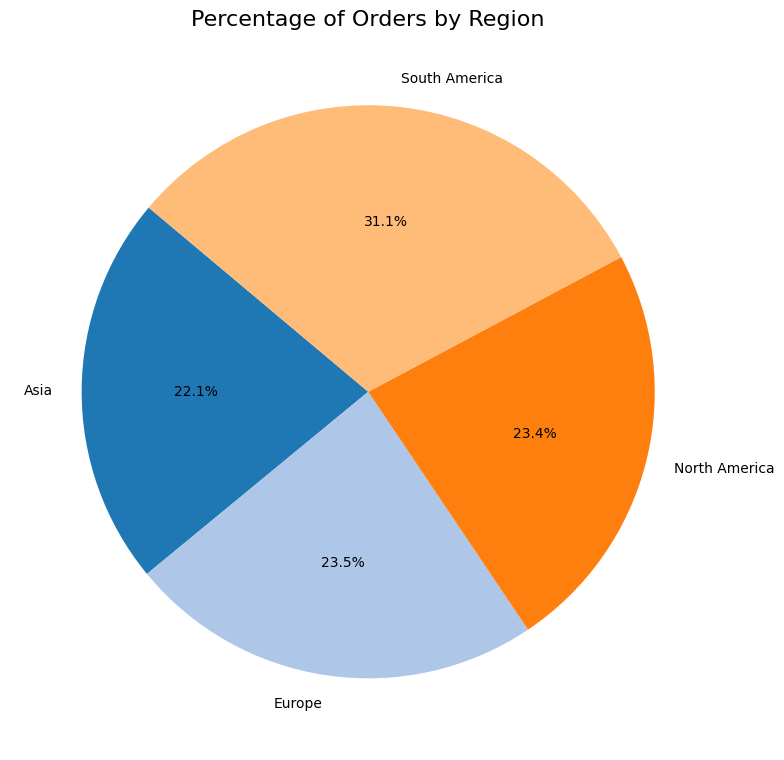

In [9]:

# Pie chart for percentage of orders by region
plt.figure(figsize=(8, 8))
colors = plt.cm.tab20.colors  # Use a colormap for vibrant colors
plt.pie(region_orders['Percentage'], labels=region_orders['Region'], autopct='%.1f%%',
        startangle=140, colors=colors)
plt.title('Percentage of Orders by Region', fontsize=16)
plt.tight_layout()
plt.show()
